In [142]:
using Plots, ProgressMeter
include("../sylow_double_cosets.jl")

stationary_distribution

In [ ]:
p = 11
k = 10
reps = 100
n_samples = 10000

10000

In [160]:
samples = zeros(Int, n_samples, reps)
@showprogress for i in 1:n_samples
    _, sizes = sylow_burnside(p, k, reps)
    samples[i, 1:reps] = sizes
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:50


In [161]:
vals = collect(1:2*k)
emperical_dist_ = sum(samples .== reshape(vals, 1, 1, :), dims = 1)./n_samples
emperical_dist = dropdims(emperical_dist_, dims=1)
stationary_dist = stationary_distribution(p, k)
TV = sum(abs.(emperical_dist .- reshape(stationary_dist,1,:)), dims = 2)/2
ts = 1:reps
approx_TV = @. 1 - (1 - (1 - 1/p)^(ts - 1)) ^ k

110-element Vector{Float64}:
 1.0
 0.9999999999614456
 0.9999999752064198
 0.9999990953108475
 0.9999897574456327
 0.9999387235549443
 0.9997544490812226
 0.9992520383617799
 0.9981323987378666
 0.9959868190184624
 ⋮
 0.0006594925259147955
 0.0005995548391911631
 0.0005450632255143972
 0.0004955230744969619
 0.00045048465580799224
 0.00040953905383256384
 0.0003723144693594804
 0.0003384728553852412
 0.00030770685700842737

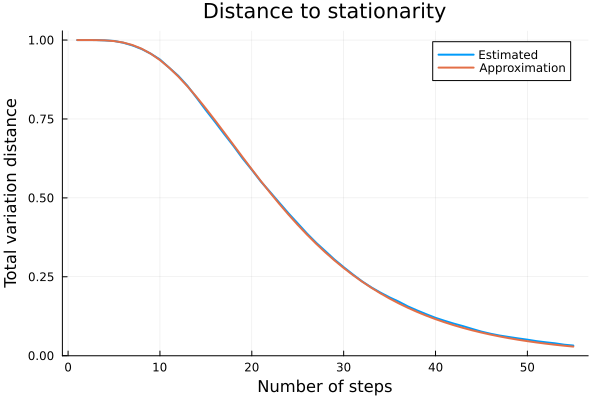

In [157]:
plot(ts, TV, label="Estimated",  linewidth=2)
plot!(1:reps, approx_TV, label="Approximation", linewidth = 2)
xlabel!("Number of steps")
ylabel!("Total variation distance")
title!("Distance to stationarity")